In [68]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)

In [70]:
df.head() #diplay the fisrt 5 dataset.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

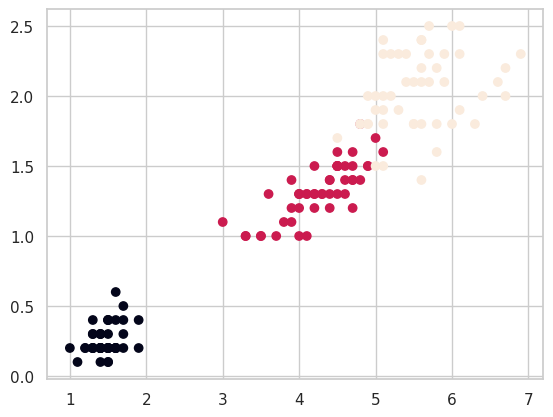

In [74]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

In [75]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


<Axes: >

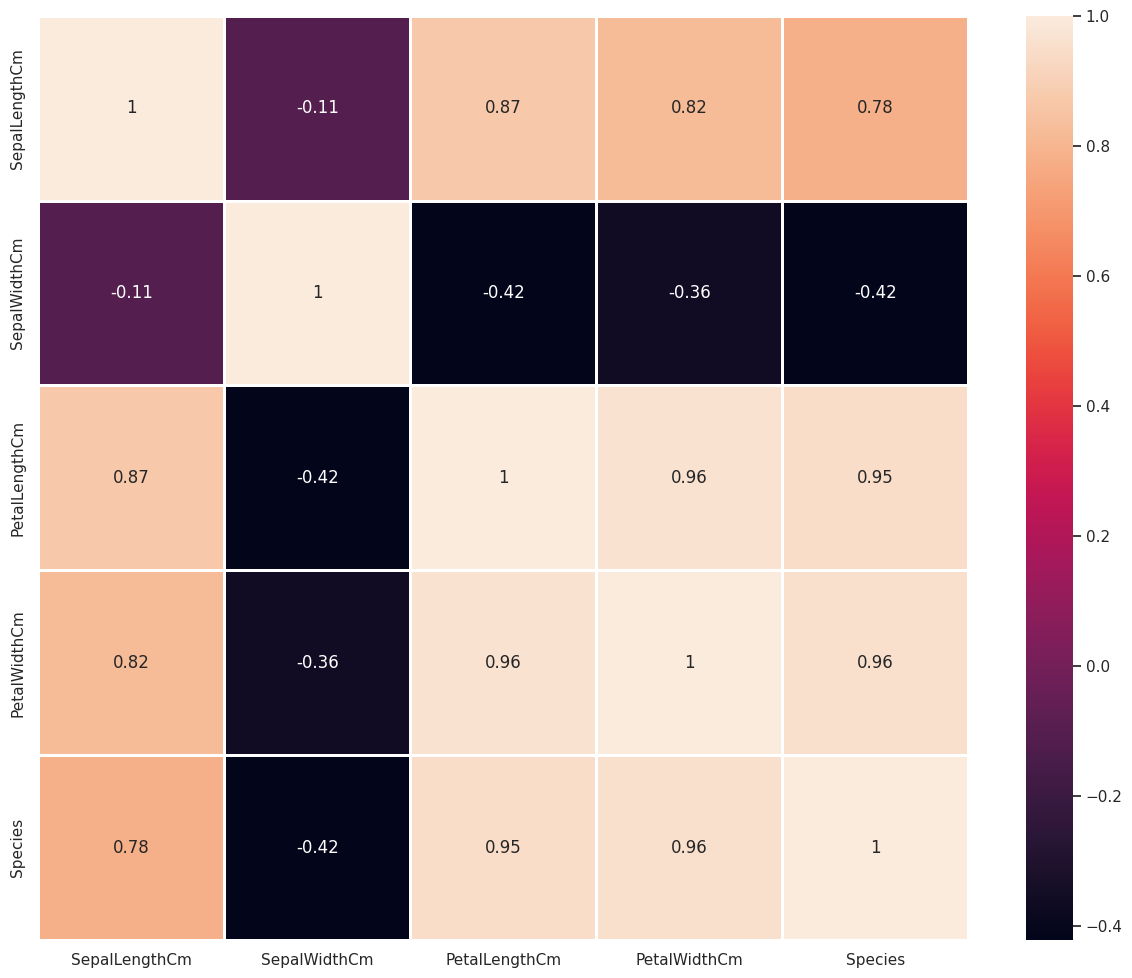

In [76]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

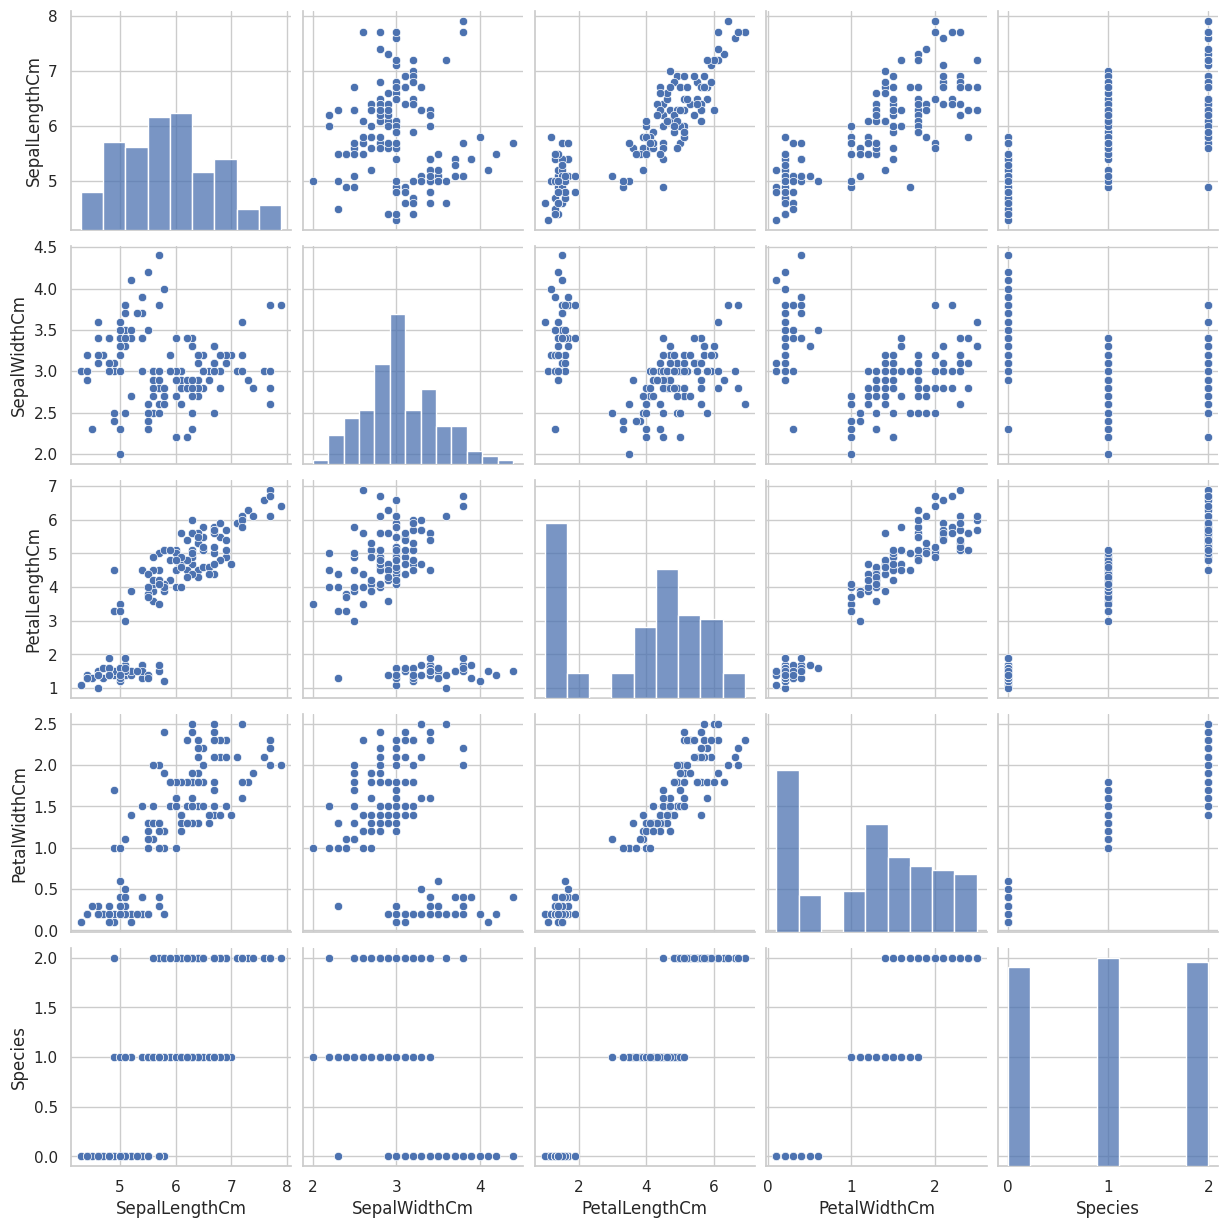

In [77]:
sns.pairplot(df)

In [78]:
df=df.iloc[:,[0,1,2,3]].values

In [79]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_) 
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[663.895238095238,
 151.77145833333333,
 77.91989035087718,
 56.64237065018315,
 45.81642192982456,
 38.380978808131445,
 34.117070947570944,
 29.758015809726338,
 27.74499792038028,
 25.769652682285034]

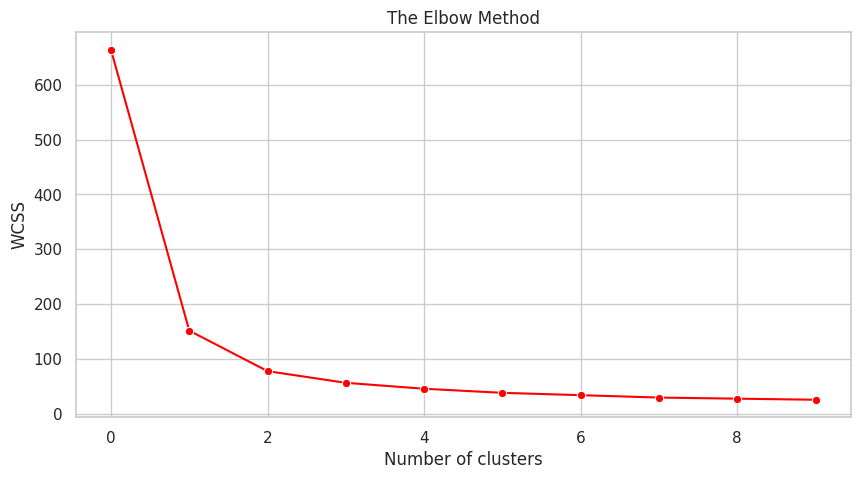

In [80]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
x=range(1, 11)
y=wcss
sns.lineplot(y,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

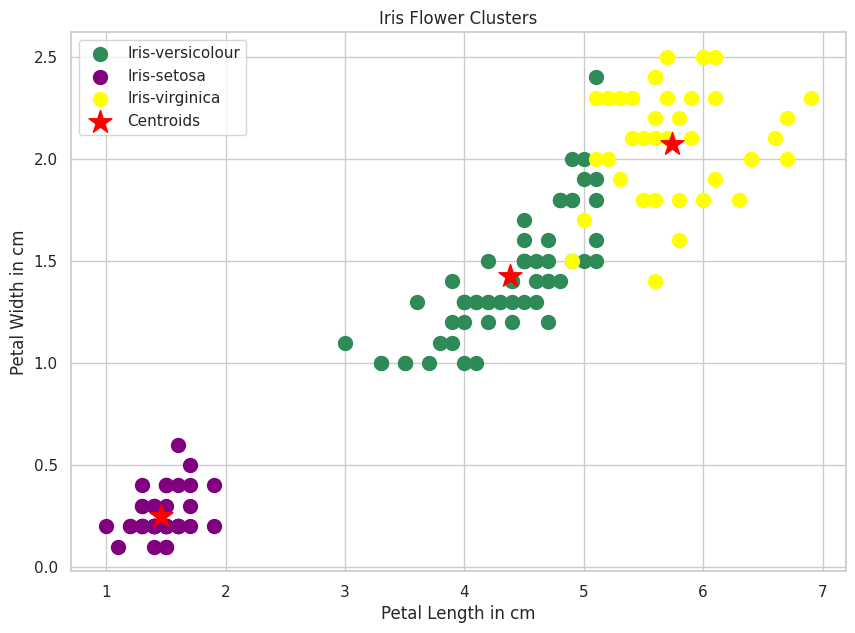

In [82]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()